# MidTerm Project: Predicting Life Expectancy

## 1. Data Exploration and Understanding:
a. Load the dataset and understand the data distribution. Filter the independent and dependent variables/features.  
b. Perform initial analysis (shape of the data, number of missing values, datatypes of each column, histogram of the target variable).

In [190]:
import pandas as pd

dataset = pd.read_csv('Life Expectancy Data.csv')

# Some columns have leading/trailing whitespaces
for column in dataset.columns:
    if column.strip() != column:
        dataset.rename(columns={column: column.strip()}, inplace=True)

dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [192]:
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<Axes: title={'center': 'Target variable (Life expectancy) distribution'}, ylabel='Frequency'>

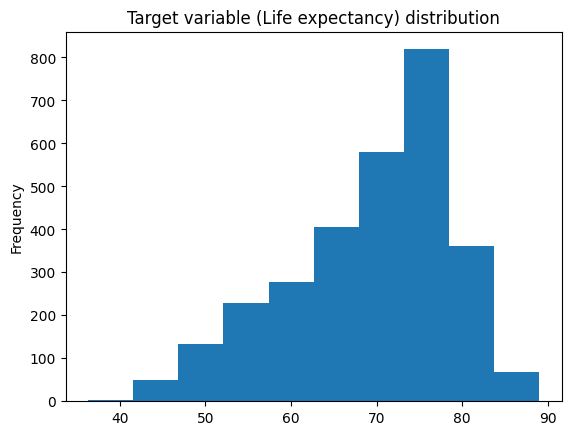

In [193]:

dataset['Life expectancy'].plot(kind='hist', title='Target variable (Life expectancy) distribution')


## 2. EDA and Data Preprocessing:
a. Handling Missing Values: Apply mean imputation for numerical features and mode imputation for categorical features.  
b. Encoding categorical feature: Figure out which type of encoding to apply(One-hot/Label) and perform encoding.

In [194]:
from sklearn.impute import SimpleImputer

object_columns = dataset.select_dtypes(include='object').columns
number_columns = dataset.select_dtypes(exclude='object').columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

dataset[number_columns] = num_imputer.fit_transform(dataset[number_columns])
dataset[object_columns] = cat_imputer.fit_transform(dataset[object_columns])

dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[object_columns])], axis=1)
dataset.drop(object_columns, axis=1, inplace=True)
dataset.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True


## 3. Feature Engineering:
a. Feature Scaling: Apply different feature scaling techniques (Standard, MinMax, Robust) and finalize one scaler to proceed with, based on your reasonings.  
b. Feature Extraction: Find out top 5 features based on the correlation matrix. Provide them as your observations.

In [196]:
corr_matrix = dataset.corr()
target_corr = corr_matrix['Life expectancy'].abs().sort_values(ascending=False)
target_corr[:6]

Life expectancy                    1.000000
Schooling                          0.715066
Adult Mortality                    0.696359
Income composition of resources    0.692483
BMI                                0.559255
HIV/AIDS                           0.556457
Name: Life expectancy, dtype: float64

In [197]:
top5_dataset = dataset[target_corr[:6].index]

In [198]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

data = dataset.drop('Life expectancy', axis=1)
target = dataset['Life expectancy']

top5_data = top5_dataset.drop('Life expectancy', axis=1)
top5_target = top5_dataset['Life expectancy']

scaler = StandardScaler()
std_scaled_data = scaler.fit_transform(data)
top5_std_scaled_data = scaler.fit_transform(top5_data)

scaler = MinMaxScaler()
minmax_scaled_data = scaler.fit_transform(data)
top5_minmax_scaled_data = scaler.fit_transform(top5_data)

scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)
top5_robust_scaled_data = scaler.fit_transform(top5_data)

## 4. Model Building:
a. Use an initial train-test split of 60% and 40%.  
b. Build a multiple linear regression model based on the set of independent features you want to proceed with. (You can consider all of them or drop a few based on the scope of the problem)  
c. Find the best fit line and plot it.  
d. Build a simple linear regression model by extracting the top most important feature(from the correlation matrix).  
e. Find the best fit line for simple linear regression and plot it.

In [199]:
from sklearn.model_selection import train_test_split

std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(std_scaled_data, target, test_size=0.4)
minmax_x_train, minmax_x_test, minmax_y_train, minmax_y_test = train_test_split(minmax_scaled_data, target, test_size=0.4)
robust_x_train, robust_x_test, robust_y_train, robust_y_test = train_test_split(robust_scaled_data, target, test_size=0.4)

top5_std_x_train, top5_std_x_test, top5_std_y_train, top5_std_y_test = train_test_split(top5_std_scaled_data, top5_target, test_size=0.4)
top5_minmax_x_train, top5_minmax_x_test, top5_minmax_y_train, top5_minmax_y_test = train_test_split(top5_minmax_scaled_data, top5_target, test_size=0.4)
top5_robust_x_train, top5_robust_x_test, top5_robust_y_train, top5_robust_y_test = train_test_split(top5_robust_scaled_data, top5_target, test_size=0.4)

print('entire_data:', std_x_train.shape, std_x_test.shape)
print('top5_data:', top5_std_x_train.shape, top5_std_x_test.shape)

entire_data: (1762, 214) (1176, 214)
top5_data: (1762, 5) (1176, 5)


In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
std_pca_x_train = pca.fit_transform(std_x_train)
std_pca_y_train = pca.transform(std_x_test)
minmax_pca_x_train = pca.fit_transform(minmax_x_train)
minmax_pca_y_train = pca.transform(minmax_x_test)
robust_pca_x_train = pca.fit_transform(robust_x_train)
robust_pca_y_train = pca.transform(robust_x_test)

top5_std_pca_x_train = pca.fit_transform(top5_std_x_train)
top5_std_pca_y_train = pca.transform(top5_std_x_test)
top5_minmax_pca_x_train = pca.fit_transform(top5_minmax_x_train)
top5_minmax_pca_y_train = pca.transform(top5_minmax_x_test)
top5_robust_pca_x_train = pca.fit_transform(top5_robust_x_train)
top5_robust_pca_y_train = pca.transform(top5_robust_x_test)

del std_x_train, minmax_x_train, robust_x_train, top5_std_x_train, top5_minmax_x_train, top5_robust_x_train
del std_x_test, minmax_x_test, robust_x_test, top5_std_x_test, top5_minmax_x_test, top5_robust_x_test

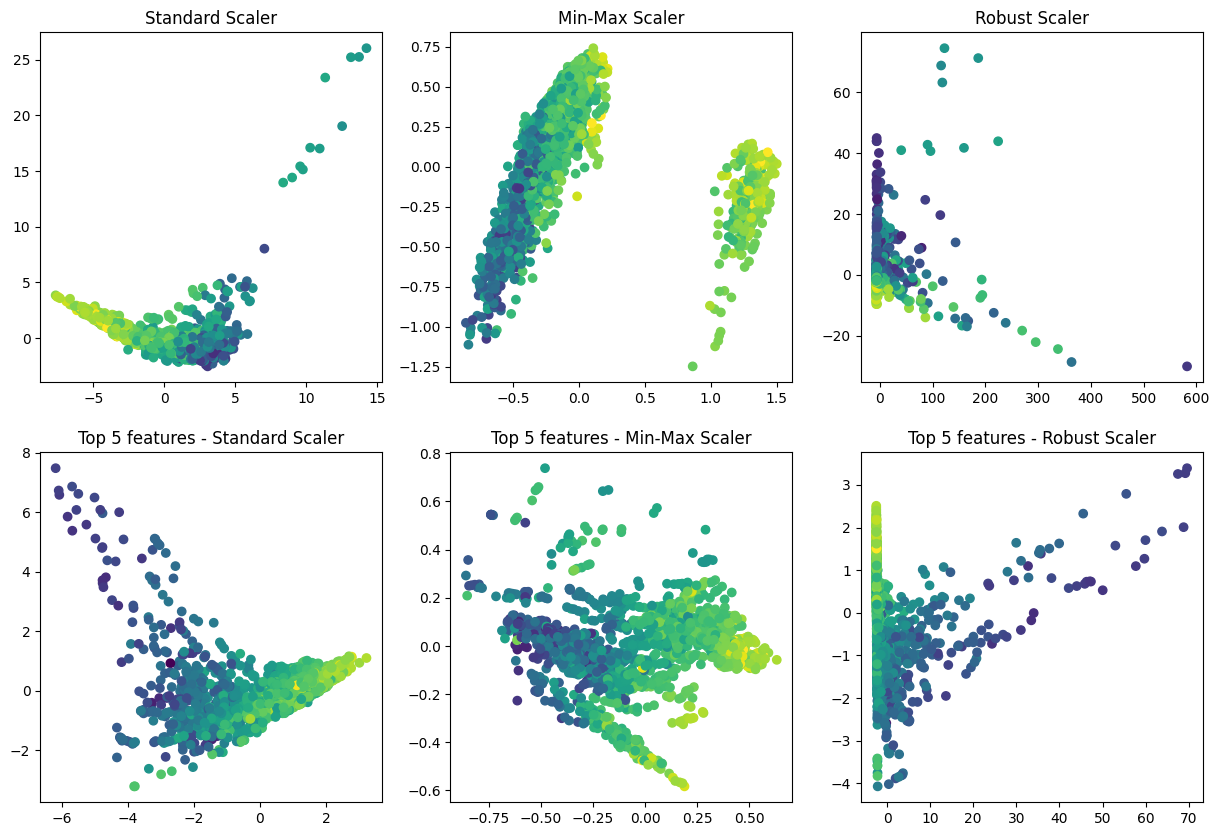

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Standard Scaler')
plt.scatter(std_pca_x_train[:, 0], std_pca_x_train[:, 1], c=std_y_train)

plt.subplot(2, 3, 2)
plt.title('Min-Max Scaler')
plt.scatter(minmax_pca_x_train[:, 0], minmax_pca_x_train[:, 1], c=minmax_y_train)

plt.subplot(2, 3, 3)
plt.title('Robust Scaler')
plt.scatter(robust_pca_x_train[:, 0], robust_pca_x_train[:, 1], c=robust_y_train)

plt.subplot(2, 3, 4)
plt.title('Top 5 features - Standard Scaler')
plt.scatter(top5_std_pca_x_train[:, 0], top5_std_pca_x_train[:, 1], c=top5_std_y_train)

plt.subplot(2, 3, 5)
plt.title('Top 5 features - Min-Max Scaler')
plt.scatter(top5_minmax_pca_x_train[:, 0], top5_minmax_pca_x_train[:, 1], c=top5_minmax_y_train)

plt.subplot(2, 3, 6)
plt.title('Top 5 features - Robust Scaler')
plt.scatter(top5_robust_pca_x_train[:, 0], top5_robust_pca_x_train[:, 1], c=top5_robust_y_train)

In [202]:
from sklearn.linear_model import LinearRegression

std_model = LinearRegression()
std_model.fit(std_pca_x_train, std_y_train)

minmax_model = LinearRegression()
minmax_model.fit(minmax_pca_x_train, minmax_y_train)

robust_model = LinearRegression()
robust_model.fit(robust_pca_x_train, robust_y_train)

top5_std_model = LinearRegression()
top5_std_model.fit(top5_std_pca_x_train, top5_std_y_train)

top5_minmax_model = LinearRegression()
top5_minmax_model.fit(top5_minmax_pca_x_train, top5_minmax_y_train)

top5_robust_model = LinearRegression()
top5_robust_model.fit(top5_robust_pca_x_train, top5_robust_y_train)

LinearRegression()

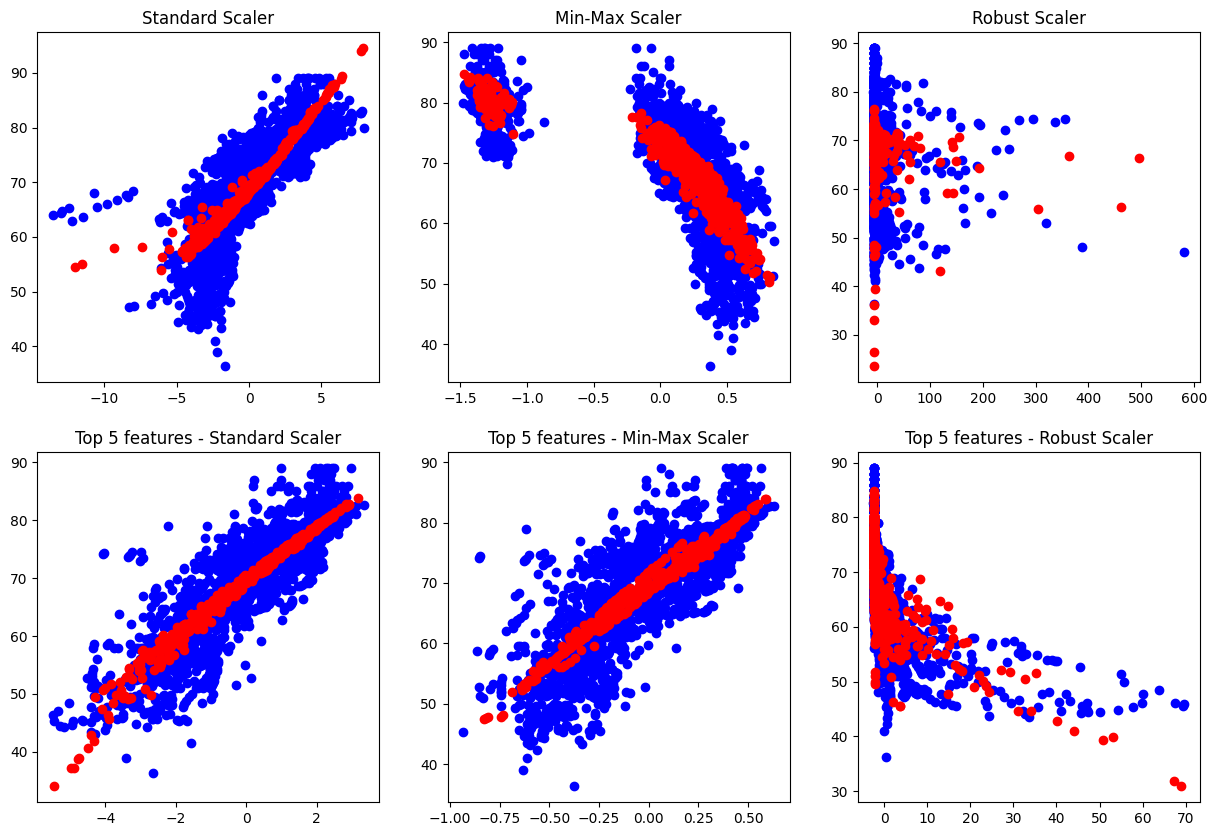

In [213]:
std_model_prediction = std_model.predict(std_pca_y_train)
minmax_model_prediction = minmax_model.predict(minmax_pca_y_train)
robust_model_prediction = robust_model.predict(robust_pca_y_train)
top5_std_model_prediction = top5_std_model.predict(top5_std_pca_y_train)
top5_minmax_model_prediction = top5_minmax_model.predict(top5_minmax_pca_y_train)
top5_robust_model_prediction = top5_robust_model.predict(top5_robust_pca_y_train)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Standard Scaler')
plt.scatter(std_pca_x_train[:, 0], std_y_train, color='blue')
plt.scatter(std_pca_y_train[:, 0], std_model_prediction, color='red')

plt.subplot(2, 3, 2)
plt.title('Min-Max Scaler')
plt.scatter(minmax_pca_x_train[:, 0], minmax_y_train, color='blue')
plt.scatter(minmax_pca_y_train[:, 0], minmax_model_prediction, color='red')

plt.subplot(2, 3, 3)
plt.title('Robust Scaler')
plt.scatter(robust_pca_x_train[:, 0], robust_y_train, color='blue')
plt.scatter(robust_pca_y_train[:, 0], robust_model_prediction, color='red')

plt.subplot(2, 3, 4)
plt.title('Top 5 features - Standard Scaler')
plt.scatter(top5_std_pca_x_train[:, 0], top5_std_y_train, color='blue')
plt.scatter(top5_std_pca_y_train[:, 0], top5_std_model_prediction, color='red')

plt.subplot(2, 3, 5)
plt.title('Top 5 features - Min-Max Scaler')
plt.scatter(top5_minmax_pca_x_train[:, 0], top5_minmax_y_train, color='blue')
plt.scatter(top5_minmax_pca_y_train[:, 0], top5_minmax_model_prediction, color='red')

plt.subplot(2, 3, 6)
plt.title('Top 5 features - Robust Scaler')
plt.scatter(top5_robust_pca_x_train[:, 0], top5_robust_y_train, color='blue')
plt.scatter(top5_robust_pca_y_train[:, 0], top5_robust_model_prediction, color='red')

plt.show()

## 5. Model Evaluation and Tuning:
a. Evaluate the performance of each model (simple linear regression and multiple linear regression) by computing metrics - MAE(Mean Absolute Error), MSE(Mean Squared Error), RMSE(Root Mean Squared Error) and R2 (coefficient of determination).  
b. Try modifying the train-test split as 80% and 20% and repeat the steps 4(Model Building) and 5(Model Evaluation and Tuning). Notice the performance improvement and provide them under observations.  
c. Choose one of the cross validation techniques(Holdout/LOOCV/Stratified/K-Fold) and apply it to see if there is a performance improvement. Provide reasoning on why a particular cross validation technique has been used.

In [203]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

results = []

for model, prediction in zip(
    ['Standard Scaler', 'Min-Max Scaler', 'Robust Scaler', 'Top5 features - Standard Scaler', 'Top5 features - Min-Max Scaler', 'Top5 features - Robust Scaler'],
    [std_model_prediction, minmax_model_prediction, robust_model_prediction, top5_std_model_prediction, top5_minmax_model_prediction, top5_robust_model_prediction]
):
    results.append({
        'Model': model,
        'MAE': mean_absolute_error(std_y_test, prediction),
        'MSE': mean_squared_error(std_y_test, prediction),
        'RMSE': root_mean_squared_error(std_y_test, prediction),
        'R2': r2_score(std_y_test, prediction)
    })

results_df = pd.DataFrame(results)
print(results_df)

                             Model       MAE         MSE       RMSE        R2
0                  Standard Scaler  4.558195   32.513194   5.702034  0.641470
1                   Min-Max Scaler  9.579367  139.613058  11.815797 -0.539541
2                    Robust Scaler  8.596135  125.391163  11.197820 -0.382714
3  Top5 features - Standard Scaler  9.791548  154.255161  12.419950 -0.701003
4   Top5 features - Min-Max Scaler  9.992961  156.235747  12.499430 -0.722843
5    Top5 features - Robust Scaler  9.977972  160.161032  12.655474 -0.766128


In [204]:
print('Greatest MAE :', results_df.loc[results_df['MAE'].idxmin()]['Model'])
print('Greatest MSE :', results_df.loc[results_df['MSE'].idxmin()]['Model'])
print('Greatest RMSE:', results_df.loc[results_df['RMSE'].idxmin()]['Model'])
print('Greatest R2  :', results_df.loc[results_df['R2'].idxmax()]['Model'])

Greatest MAE : Standard Scaler
Greatest MSE : Standard Scaler
Greatest RMSE: Standard Scaler
Greatest R2  : Standard Scaler


In [206]:
from sklearn.model_selection import train_test_split

std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(std_scaled_data, target, test_size=0.2)
minmax_x_train, minmax_x_test, minmax_y_train, minmax_y_test = train_test_split(minmax_scaled_data, target, test_size=0.2)
robust_x_train, robust_x_test, robust_y_train, robust_y_test = train_test_split(robust_scaled_data, target, test_size=0.2)

top5_std_x_train, top5_std_x_test, top5_std_y_train, top5_std_y_test = train_test_split(top5_std_scaled_data, top5_target, test_size=0.2)
top5_minmax_x_train, top5_minmax_x_test, top5_minmax_y_train, top5_minmax_y_test = train_test_split(top5_minmax_scaled_data, top5_target, test_size=0.2)
top5_robust_x_train, top5_robust_x_test, top5_robust_y_train, top5_robust_y_test = train_test_split(top5_robust_scaled_data, top5_target, test_size=0.2)

pca = PCA(n_components=2)
std_pca_x_train = pca.fit_transform(std_x_train)
std_pca_y_train = pca.transform(std_x_test)
minmax_pca_x_train = pca.fit_transform(minmax_x_train)
minmax_pca_y_train = pca.transform(minmax_x_test)
robust_pca_x_train = pca.fit_transform(robust_x_train)
robust_pca_y_train = pca.transform(robust_x_test)

top5_std_pca_x_train = pca.fit_transform(top5_std_x_train)
top5_std_pca_y_train = pca.transform(top5_std_x_test)
top5_minmax_pca_x_train = pca.fit_transform(top5_minmax_x_train)
top5_minmax_pca_y_train = pca.transform(top5_minmax_x_test)
top5_robust_pca_x_train = pca.fit_transform(top5_robust_x_train)
top5_robust_pca_y_train = pca.transform(top5_robust_x_test)

del std_x_train, minmax_x_train, robust_x_train, top5_std_x_train, top5_minmax_x_train, top5_robust_x_train
del std_x_test, minmax_x_test, robust_x_test, top5_std_x_test, top5_minmax_x_test, top5_robust_x_test

std_model = LinearRegression()
std_model.fit(std_pca_x_train, std_y_train)

minmax_model = LinearRegression()
minmax_model.fit(minmax_pca_x_train, minmax_y_train)

robust_model = LinearRegression()
robust_model.fit(robust_pca_x_train, robust_y_train)

top5_std_model = LinearRegression()
top5_std_model.fit(top5_std_pca_x_train, top5_std_y_train)

top5_minmax_model = LinearRegression()
top5_minmax_model.fit(top5_minmax_pca_x_train, top5_minmax_y_train)

top5_robust_model = LinearRegression()
top5_robust_model.fit(top5_robust_pca_x_train, top5_robust_y_train)

std_model_prediction = std_model.predict(std_pca_y_train)
minmax_model_prediction = minmax_model.predict(minmax_pca_y_train)
robust_model_prediction = robust_model.predict(robust_pca_y_train)
top5_std_model_prediction = top5_std_model.predict(top5_std_pca_y_train)
top5_minmax_model_prediction = top5_minmax_model.predict(top5_minmax_pca_y_train)
top5_robust_model_prediction = top5_robust_model.predict(top5_robust_pca_y_train)

results = []

for model, prediction in zip(
    ['Standard Scaler', 'Min-Max Scaler', 'Robust Scaler', 'Top5 features - Standard Scaler', 'Top5 features - Min-Max Scaler', 'Top5 features - Robust Scaler'],
    [std_model_prediction, minmax_model_prediction, robust_model_prediction, top5_std_model_prediction, top5_minmax_model_prediction, top5_robust_model_prediction]
):
    results.append({
        'Model': model,
        'MAE': mean_absolute_error(std_y_test, prediction),
        'MSE': mean_squared_error(std_y_test, prediction),
        'RMSE': root_mean_squared_error(std_y_test, prediction),
        'R2': r2_score(std_y_test, prediction)
    })

results_df_2 = pd.DataFrame(results)
print(results_df_2, '\n')

print('Greatest MAE :', results_df_2.loc[results_df_2['MAE'].idxmin()]['Model'])
print('Greatest MSE :', results_df_2.loc[results_df_2['MSE'].idxmin()]['Model'])
print('Greatest RMSE:', results_df_2.loc[results_df_2['RMSE'].idxmin()]['Model'])
print('Greatest R2  :', results_df_2.loc[results_df_2['R2'].idxmax()]['Model'], '\n')

print('before MAE :', results_df.loc[results_df['MAE'].idxmin()]['MAE'],
      'After MAE :', results_df_2.loc[results_df_2['MAE'].idxmin()]['MAE'], sep='\t')
print('before MSE :', results_df.loc[results_df['MSE'].idxmin()]['MSE'],
      'After MSE :', results_df_2.loc[results_df_2['MSE'].idxmin()]['MSE'], sep='\t')
print('before RMSE:', results_df.loc[results_df['RMSE'].idxmin()]['RMSE'],
      'After RMSE:', results_df_2.loc[results_df_2['RMSE'].idxmin()]['RMSE'], sep='\t')
print('before R2  :', results_df.loc[results_df['R2'].idxmax()]['R2'],
      'After R2  :', results_df_2.loc[results_df_2['R2'].idxmax()]['R2'], sep='\t')

                             Model       MAE         MSE       RMSE        R2
0                  Standard Scaler  4.545390   32.062129   5.662343  0.636536
1                   Min-Max Scaler  9.991245  157.483100  12.549227 -0.785267
2                    Robust Scaler  8.077685  114.153075  10.684244 -0.294067
3  Top5 features - Standard Scaler  9.796859  156.941338  12.527623 -0.779125
4   Top5 features - Min-Max Scaler  9.770935  150.164734  12.254172 -0.702304
5    Top5 features - Robust Scaler  9.849289  158.176033  12.576805 -0.793122 

Greatest MAE : Standard Scaler
Greatest MSE : Standard Scaler
Greatest RMSE: Standard Scaler
Greatest R2  : Standard Scaler 

before MAE :	4.558194693685096	After MAE :	4.5453897259241165
before MSE :	32.513194276469285	After MSE :	32.06212864657479
before RMSE:	5.702034222667318	After RMSE:	5.662343035049607
before R2  :	0.641470471569773	After R2  :	0.6365359173363265


In [222]:
from sklearn.model_selection import KFold, cross_val_score

pca = PCA(n_components=2)
kfold = KFold(n_splits=5, shuffle=True)

model = LinearRegression()
std_score = -cross_val_score(model, pca.fit_transform(std_scaled_data), target, cv=kfold, scoring='neg_mean_squared_error').mean()

model = LinearRegression()
minmax_score = -cross_val_score(model, pca.fit_transform(minmax_scaled_data), target, cv=kfold, scoring='neg_mean_squared_error').mean()

model = LinearRegression()
robust_score = -cross_val_score(model, pca.fit_transform(robust_scaled_data), target, cv=kfold, scoring='neg_mean_squared_error').mean()

model = LinearRegression()
top5_std_score = -cross_val_score(model, pca.fit_transform(top5_std_scaled_data), top5_target, cv=kfold, scoring='neg_mean_squared_error').mean()

model = LinearRegression()
top5_minmax_score = -cross_val_score(model, pca.fit_transform(top5_minmax_scaled_data), top5_target, cv=kfold, scoring='neg_mean_squared_error').mean()

model = LinearRegression()
top5_robust_score = -cross_val_score(model, pca.fit_transform(top5_robust_scaled_data), top5_target, cv=kfold, scoring='neg_mean_squared_error').mean()

results_df_3 = pd.DataFrame({
    'Model': ['Standard Scaler', 'Min-Max Scaler', 'Robust Scaler', 'Top5 features - Standard Scaler', 'Top5 features - Min-Max Scaler', 'Top5 features - Robust Scaler'],
    'Score(MSE)': [std_score, minmax_score, robust_score, top5_std_score, top5_minmax_score, top5_robust_score]
})

print(results_df_3)

                             Model  Score(MSE)
0                  Standard Scaler   32.398139
1                   Min-Max Scaler   36.830030
2                    Robust Scaler   55.933006
3  Top5 features - Standard Scaler   20.863351
4   Top5 features - Min-Max Scaler   28.347514
5    Top5 features - Robust Scaler   21.614507


In [223]:
print('Test data:60% Train data:40%')
print(results_df, '\n')

print('Test data:80% Train data:20%')
print(results_df_2, '\n')

print('Cross Validation')
print(results_df_3)

Test data:60% Train data:40%
                             Model       MAE         MSE       RMSE        R2
0                  Standard Scaler  4.558195   32.513194   5.702034  0.641470
1                   Min-Max Scaler  9.579367  139.613058  11.815797 -0.539541
2                    Robust Scaler  8.596135  125.391163  11.197820 -0.382714
3  Top5 features - Standard Scaler  9.791548  154.255161  12.419950 -0.701003
4   Top5 features - Min-Max Scaler  9.992961  156.235747  12.499430 -0.722843
5    Top5 features - Robust Scaler  9.977972  160.161032  12.655474 -0.766128 

Test data:80% Train data:20%
                             Model       MAE         MSE       RMSE        R2
0                  Standard Scaler  4.545390   32.062129   5.662343  0.636536
1                   Min-Max Scaler  9.991245  157.483100  12.549227 -0.785267
2                    Robust Scaler  8.077685  114.153075  10.684244 -0.294067
3  Top5 features - Standard Scaler  9.796859  156.941338  12.527623 -0.779125
4   

## 6. Final Presentation and Report:
a. Prepare a 10-20 minute presentation covering:  
i. Dataset overview and preprocessing steps.  
ii. Key findings from exploratory data analysis.  
iii. Reasoning behind feature scaling techniques.  
iv. Results and interpretation of regression models.  
v. Reasoning behind cross validation technique.  
vi. Challenges faced and how they were resolved.